# Configuracion

In [109]:
import os, struct, os.path
import Image
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros
os.chdir('..')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'

import sys
caffe_root = '/home/lex/caffe-master/'  # CONFIGURAR PARA CADA PC!!
sys.path.append("/home/lex/caffe-master/python")

import caffe # Importa la libreria CAFFE

In [99]:
# Elegimos el tipo de solver para la red
solver = caffe.SGDSolver('/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/Arc_1_solver.prototxt')

In [100]:
filters=[]# Configuramos el hardware que usaremos para entrenar
caffe.set_device(0)
caffe.set_mode_gpu()

# Entrenamiento

In [101]:
%%time 
niter = 200 # el SGD solo realizara 200 iteraciones
test_interval = 25 # probaremos el conjunto de prueba cada 25 iteraciones

# Aqui se crean las estructuras para alojar los datos de entrenamiento
train_loss = np.zeros(niter) # guarda loss
test_acc = np.zeros(int(np.ceil(niter / test_interval))) # guarda accuracy
#output = np.zeros((niter, 8, 10)) # guarda salida de la red


filters=[]


# Main loop entrenamiento
for it in range(niter):
    solver.step(1)  # Se ejecuta q vez el SGD
    
    # Guarda una imagen de los pesos de la capa 1 en cada iteracion
    a=(solver.net.params['conv1'][0].diff[:, 0].reshape(4, 5, 5, 5).transpose(0, 2, 1, 3).reshape(4*5, 5*5))
    filters.append(a)
    
    # guarda loss
    train_loss[it] = solver.net.blobs['loss'].data
    
   
    # Para correr  pruebas cada 25 iteraciones lo configuramos aca, CAFFE puede 
    # configurarse para hacerlo automaticamente si se desea.
    if it % test_interval ==0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
           
            
            correct += sum(solver.test_nets[0].blobs['ip2'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4# Aqui se carga el modelo preentrenado


Iteration 0 testing...
Iteration 25 testing...
Iteration 50 testing...
Iteration 75 testing...
Iteration 100 testing...
Iteration 125 testing...
Iteration 150 testing...
Iteration 175 testing...
CPU times: user 5.16 s, sys: 544 ms, total: 5.71 s
Wall time: 5.18 s


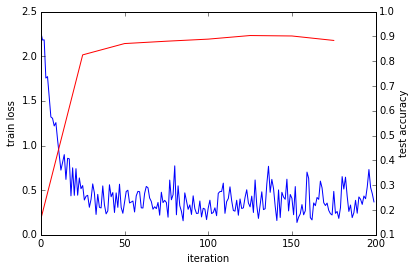

In [102]:
#Mostramos el train error y el test accuracy
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')# Aqui se carga el modelo preentrenado
ax2.set_ylabel('test accuracy')

# VALIDACION

In [103]:
MODEL_FILE = '/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/Arc_1_deploy.prototxt'
PRETRAINED = '/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/snapshots/_iter_100.caffemodel'

In [104]:
# Crea la redfor it in images:

caffe.set_mode_cpu()
#net = caffe.Net(MODEL_FILE,PRETRAINED,caffe.TEST)

net = caffe.Classifier(MODEL_FILE,PRETRAINED,channel_swap='0')

In [105]:
#images, labels = load_mnist('testing', digits=[2],path='/home/lex/caffe-master/data/mnist/')

error=0
totalFiles=0
correctLabels=[]
predictedLabels=[]
for it in range(10):
    it
    path = '/home/lex/2_SISTEMIC/9_Deep_Learning/1_Datasets/2_MNIST/testing/'+str(it)+'/'
    num_files = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))
    totalFiles=totalFiles+num_files
    for it2 in range(num_files):
        IMAGE_FILE = path + str(it2) + '.png'# Path de la imagen
        input_image = caffe.io.load_image(IMAGE_FILE,False)#carga una imagen en el modelo
        prediction = net.predict([input_image])
        
        correctLabels.append(it)
        predictedLabels.append(prediction[0].argmax())
#         
        if prediction[0].argmax()!=it:
            error=error+1
            

from __future__ import division
print 'Error de prueba:',(error/totalFiles)*100,'%'    

Error de prueba: 16.67 %


[[ 911    0    4   15    0   12   25   10    2    1]
 [   0 1094    2    2   10    8    4    0   15    0]
 [   9    1  795   27   18   57   43   21   60    1]
 [  19    1    4  751    0   58   18   11  146    2]
 [   3    2    6    0  884    8   24   10   20   25]
 [  29    8   20  124    4  598   22   55   30    2]
 [  11    5   26   11   19   14  868    0    4    0]
 [   9    9   15    1    6   36    2  938    5    7]
 [   4    4    4   39    5   44    4   33  837    0]
 [  15    5    2    5   63   22    1  178   61  657]]


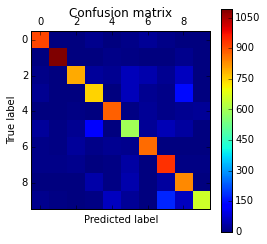

In [106]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(correctLabels, predictedLabels)


print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)(n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1))
plreshape(4,t.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thingdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATQAAAD7CAYAAADkSGhKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJztvV2obt113zfW2ftI7/umhRKrSLJxa0u8haREkn1hZNJiX5TYIZA0Nwk2uDKkJRd1Wupi4twkaXvRphBhUCCU+gPH2E4Dxa59kTRKqal902AsNW4bqY2w/JHKkvxFU5B5z9579eI9Y7///d///xhjPvvjOef4GbBYc8211lxzjjnGb44519rP3vZ9j5Oc5CQneRXkybErcJKTnOQk9yUnoJ3kJCd5ZeQEtJOc5CSvjJyAdpKTnOSVkRPQTnKSk7wycgLaSU5ykldGzh+q4G3bTt+DnOQkJ3kQ2fd9U/kHA23btm+PiB+IiLOI+MF93/8GX/Pd3/3dt+771Kc+Fd/4jd+YZch9pjEft0leVUZEBH5/l2m3f/LkSWzbFk+ePLmR5ryf+7mfi2/7tm+Lp0+fxrve9a5278pT+33f4+LiotwuLy+v99gGl8792dlZnJ2dxZMnT+Q+0z/+4z8e3/Vd33VdztXV1XUaN5dfbdyfuWX7VX/zN5TqeN/3+MpXvhJf+cpX4vd///dv7Dn96U9/Ot588824urqKy8vLuLq6KtNsu9V2dnZW2gPnnZ+fX29Pnz6V6Tzutiz3E5/4RHzv937vLZ90kn052dL2nj17dssuVR7aSZbh8li+7/u+z9b5oCnntm1nEfG3IuLbI+KPRsR3bNv2Rw4p6yQnOclJ7ksOXUP7poj4Z/u+f37f92cR8Xcj4s/cX7VOsioY3Z7kJH9Q5VCgfU1E/Doc/8bzvFbe9773HfjIF1++/uu//mjPfow/Yfvwhz/84M84pnzVV33VsavwoPLN3/zNx67Cg8uha2gj7/n0pz99nX7f+94X73//++Orv/qrb61tdfvJuhmfd+ew7Ij7AUGuASHQ1FoVrxFs23a9z3rt+x5Pnjy5LhP3l5eXNza1jpH5/HxXJyVuHegjH/nIjXs4Ksxz9xEtYn8pUe3idB5zH7h1xfe85z231m2q9HT9jNcDee/ynP2ijpze+P6It4Hm1h+djqcbrnl1Gz5f1YPzPve5z8XnPve5tr4RhwPtn0fE18Lx18bbUdoNycV/lA5Y6twEUF15Kg+NUgEk9yh8ns9VDuSghiDDsjGNwFIbw22yYK76BtvEzpigzQXxJ0+eXKdRt658fpZ7/goQK2BzXqWD6t7qWgUZBzH1EqiDWTegd3qr7lFtc+2tIHaXl0NO9ygf/OAH44Mf/OD18Sc/+Ul5XcThQPvFiHhz27avi4j/JyL+fER8B19UKVilu/NTUE3yGFgVxCpxgJuMaFg3BlluCb1936/fYCqYcfou4pwq24cgY31yutIbP3MqK9FnNcioeqj6TexB2ap7O169Ne90n+WrND7bgVC1iW3eDQITWDHk3HVcftcfUzkIaPu+X2zb9j0R8T/G259t/NC+7/+Ur5uMwpXiHZx4f8g1z9thAXeodBEZbtxmNxIn2PCzjApsLmpi6ZwBt3Q+9bkC7is9dtByDtzJBGaTyKCLVNw1qv7u8x4VqXG0xnmVjfCzVX04zXbf6XYyOK9MOR3U7kMO/g5t3/e/HxF/v7rmyRP9zmHixJl3X3sFtOftuM6fKpajsg6GXfjt2oxpjMIU1Nw3Utg+1D+2Q+lFOWemr66urveq3i5C66KyyiFdWZPRfhLRVfVU+U53DmoKYgpk1aDiYO+ezzqc2qrSpxskDvnmkKHGz7iLPNhfCkT4CC330xHIGc5k3+WlKGdTo3PlYHnPdFTr2oLpfd8lzHi66T76VHV3/eP6SMFMPUPprgJcF2k46UDVRQQd4CZprrfSmYrMHNjcQOL8Q/kLHzsQTgbkSp9u5nFotKZkagspRwHaBGSqg7jMCeBcXudwq9Ea31OBDA1BPVsddy8FGHKoQ44mHJirwQajCy4f7+GIV+nG6brrW9Y33ltFEZPogGUFZljPCdAUxCZTzQpeXAeVzj33UdV2peNphFatnymZXNPJCwU014GqrCnYXB7LqhLZWTHtDAA7WE3XuudN33AycJzuMKLicypKUDBzEORRX0Goso9KL8rhlM7xWuUoDmxTgLk6q0FgFW4q7Z6F9eB0ZQcrcKlAdWhUVoGO7WcqRwXaypsdV+ZkVK/AGHH4m5UOat3IheV0deAIrYrYEFSoa5ZulHcOxpJvVauBaBVsnbjIooObi9AmURofO1t0MJsM4CufcLhn8zW453Zy/yhZgRKDjSFX9cN9yFGANl0zqMrontelUZHKyVAcuNR1LjLgDsYITY1OnFYRmoJcls8AyrUv1WbMqxzNRWi5KZ0ytKZgm0CuG+HV+Q5kEwdTZamIaBKZVZGa84XJfhogHAqybt1s9SPb+4LbgwLNRQUVxFSI3YkbrdRxOp6DmBrFWDrAOZixMbCTu33EOxGa+uZMveVMPWab8qNYpwMlk4iic5wKbJPBatL/KasOpO5fSau6u4FgBWDTdbS77Cc27vI70E2jOSxvot+JPCjQVOV4FME0d2olh4BO1Wl1hHbG574rciMjPkt1bhfhKaecjNCTrVq0xrqrvux0x1DFtOsv5YRTp3GOpOqW0F9J3yXqquxF+Qf380TfeD/rvNKp0vGhLwAcBypbOFQeFGhK0hjYgCej/H08G9PdqJGbA4X6vih/O0wZqtODA5qqj9IXw3/f9xvPnqznTD4rQGeuooZK506qPnbR1KqjqWeyXlaihZWIqzqPdXHHE92oflD94/SpdNttPNWs9Ib1UAPVfYDt0SO0zK+Uz9POuz5TRWEVwDrpRucVqE0AVtXPQU3p0kGughhfo6Dm9N0ZeNazshMnk6mN+vMb1g+3ccWJHPQryE1fDrjnrURnyrdwIFWyEoFN/qzJ2Wteg3W8S2SWcrQpJ+cpA7uPZ6sR1wHCdSbXUxkv/9LrdNrJz63qoYwj4p2/reR1s86RHLRcHsOMn6P0PxF2sEMjiKnT8bOxH1fqPZ1qHgq1qf1we/iY+4uh1g2qKzBzQYFrC/uXyl+RRwdaFQVNO7EaXdwoNAHG5DkKCvwT1hyhJZx5dFL66KIOrAdKOmNeM3WgQyM0fKlRSWWYVaSg7nf9VzncZMrZDaKujisgu0tkdl/CUHNt7GzQfYfWDbxVmutwqBxlysnn3IjvOljldx2E6emG9zoQ4HZ+fn4rYlPtqUA/rQ/qQY22q6P/ZP2sW0NT7XH9w1I5mYsknHNVDojPU+2f1BXLUIMX620KNddvTlYCg9w6n1zdXATsBhDcT/S8CvmjvBRQMh0tDy3/kM5yEGEnyKjMGbcyTBdtdHVResO9yq+cp4rGqugsp7nq+dXgourvAK/0hGn33VP3YSc/nyPpTtfuXoaYghrDresjPH8fMoHkFGDVtDPLWn2+qs+KHH3KqTrOjU4rjbtLFOTKUSBgqKn1tWk0UxkQiipHHbuRn48nIHPRBeul6wMlCTWGm4J+Hk9hVr2Bu+sgOllDm8CtAhnriaXTsYvQVF+tDLITsFX1mNZ/VY425URxzqWum5Q9dQ6l+A5wXFeMzs7OzkojVvXkOjqjwedn+xRQujwFNAdhBTn3axuqbU5UVFZFatwfypkqB6umnNzWqbCtVrqbQqzrsxVxUV4HxcpPurVK/AWZrm4VWO8iR4/QWFRHO7Cocx3MsA7diMTlK+hyhKZAUY1MK3VBmDl9VQBz+9Vpp/vzpxWp+raSLjJgwB0y5VT1dG3oorNDXgxwH3X1UYMDpjsbwHJWIdZFclwvZcNqwD5UXqiXAl3HOoN0CsF0BSzXCZUDoMHiG04HFeX009EwRz637qKcBvWG6QqGk2mn+ukgJRVA1LEamKabg1g15XRtd6Lam/d1a6eujypbn8DH1bNKuz5juz9E/93AkSBjmLEN3AVqL8xLARakOeapMiZOwXnuvKtjByo0YqxT1XmqLk4Xqh4MVwaauleV20ULK1GGe9ZEqsGmmmZ2U9DK0Sbtz3ar67t1NAU7vq/S7VSXyo6qgVvlrQz66prJvqv/5NpKHh1oKKqxVZ66F49XNrzHPcPJJELBejGYHWD5GeqZal1G5blyVtvHzosf8FZRXV6r2qx0gLqoIi4Fq8kLAiy/0rmDGP9aSV7vojPO57XWKqJjsGHdWIdKD/wLGOoXWfh39Kb6UvsVqK1u03W5lKMCDcWBhq9xeYcCTe1ROiC4CCXLcjDDfG4vAymhOAGZewHBz890FbWp9k1AhvWqQIZtRwOupo6T9ZuV6EwJgyRBhn2H7VbwYn2cn5/fgtpkqtoNnBOouR8DnUINn8N53K/3AbFD+y3iBQCaM3B1rsq7C9Bcuc6p79I+znfn81kIs2r6p0Z1VYc8NzEUB7JuyoUwq/qzApFyNPVFeretwo2BjlEptmMKNFxfZaipe90A0okaFBJiZ2dn18f7vluQTb4rOwRmKu+VAlpl2JjH0Y27n8tw5bn8rmyW1RF0koflch4/cwK1DqR4zHnOqRTEqvNuulAZN0+XeFOQcmWp/KoPEPbYDwjnbduun18BTKUnMFN6VbZRAdxNObMdTq9TkE38p+uDlcFoRR4caJVzKZkaX1Vm19FTZ8/6T0ZIvM6NWJznppZ5zPsqSlJgUcaGz1npF4RUF6HlFhF2HU0NNh3MVB92jtcNcqh/leb+YR0ynKr9IdNNVx8UBgDqMiM0BzR13EGtOz60T7r+msij/AS36pAJuFaOnQLuQ0nZhrtMObnjcs9TS3wWP7cCGOdVMJu08ZCNnXPf9xuRGj9fjcYOburf9LmBwzkJn3M6wDTej8d5/hCgVYPACtS6gRt1h30yWaOsBoHuWJ2rYNZtK3L0NbQI33DnmOp4ohSlpApQ7pxzaFdPV48uKqjWVKrpnpNV45hACzcVvWUeQsDpRjkXwyzXgRhimK7Kr3TBAwvn8zN4OqkA1kVp7kcM3JroBGwV1NQAMonMDgFZN6is+O5UXgigoUyMTx13m1p3YedShrMSmXXOyhtDyEVlFbwqsFYRmXJ+vK+KEKegwzaqyNH1kZtm8n+Gv8tg1/Uhth+P8V4HtCnUVqI0Z4PcRjUYZJk4GFS+4WzD6c+BSuVNfPWVAFqlKE6740OVhMbaRWxTuHV1y8gFHR/rwqCYQgXbUkHL5Vcgw4jLRWcMNNQr6s0ZuIMaf3YwbU+Vj21G4KoITZXnAFYdV3s33azalHVmHaroTF27Ahp8dgec7hnTZ750QOuIzte641WgofF2IFPioKLqhGn1nQ+3dyUam4ziCiSHtlFNLx3YUNdddKEWtNXaWR67+qpnrDiLswOVXwGt+tHP6oXA5A2na1/1EuXy8vLWYHcobLp6qOtW/fOlA5pz9oRCpvF6vl+VN1WKgpgyoG5aV7VPtZPzlDAo+G9EJ0BLHWYbcGEe25/1qMqqjquIjnWJulGAr5yRPw7twI3iplRVX2BZLo0wclPJ1ell1Q6sM/Ydt40hpgZcZ5eqvEMBVF2jXgKp/BcKaN1I2oXUK5FFZZgICCx76qD5QaQaSdXzu7piVKiinOl0pIJQOn0aSKZxn3V2z+A+qgy+MlAHJrc5iPFbTjcgsZ6xHtUx91s14EXowa6yJ7YVp0e2kbzH1QfvTYhhRMbPxL7kfsW8SZ9VUWG1JtpBjGcyUzkq0FDYWTIqmYqiOhpFRilusdoZoRt9VbSmRijVbgUzBbbqmZMoSkW8nBcRt0CNz5roehphrcCN78NzqNcqksrrlHMpx8FpNNoQ9+F0IOR6cVkKZDydR3txwnW/vLy89Qy39sg2iseTgaUD2wRoVfqlBVoKN0Jd2zmau1at6ziw4Fb9eYp6ftcRyvirKYl6tc/3r0Zombfvu22bg7bT+wRwCl4XFxflf4Jnp+mAhkDC+k0cSJVb6XoyyChB/eNg7gZdrotrX2eXnF+J0v00MpsATcHrpZxyKlEO4UY6leYID8UZ/QRqbh2ER90V5bs6KJCpb5XUvZiX6dUIrYJ1ttH1lZsyMMx4nzBzIFP7bEPVtyguQlOO5fpK5U9hpgYFttmsJ0ZoleT9qn+5r7LMiT/ic12UvAK2DmgVyFyfVPLoP/CISu2cwgHN7dUzFfg6gHG6+ghStdl1AsIvjxFkmFZvyCYw4witglmmuz+Qxjp3UOsM2U0xLy4uLPg4D/U32Vcwc9MbbHc1CE76RQlHWCkYZbnnYR1Z99w3/AZa2aOqZ9pLNdBwegVq0wHxhQKaGhGUYlMU0CL8aNcZDYoyOvWqnPPcq3Y16vL0gZ+vHJHrU70YcPByOkmjcDDjCM1FG6qfVH8psLmpSjXldM6Sx6tA62CGe35xpOyo2qp6OOEBXMGLdc95CDNcWsk2YXkKZCpv33cLs7tOOydR/ksBtAj/xodHnM6Bc+Nr1XM4rcCFUFF57nU7tkXtue3OeN36WQKt0gWnHcAU4CZtw77ifuNR9ZAIrVp0VuV0AMEBZBKZqQGpsqvJpurGtpJptiOceiLYqoES+xT7GG1Z6cnlKaBVkZrrcwc0Z0cvLdCy4zCNzjE1HIYaPiPT3HnuzV6X7l4KqDTWg53ETTfVx5nYliqNz0KYcV7quvtsYwVsHdTUVBMjNAdBdoZKB3y+gpnK4/YqO5qArIIZgojzsb8SbOknmMYy8F6uq9NTd1z1g0tPoaZsx9nVihz9OzSOznDvtm561I2mLvKq8tT9+Kyp4l3deNqrojTWXeU8LhrjtIrQHLCzncroGBIVmA79polH94lTVuByeXif6r8VkDm7nEANYYYgczMA1Iuzt64NuE0GFzXYdECbQuyFA5qqTBpMxE2jy+hMAY2dLM8r0KSozusir8nU0kH0UOH6VVNOBa7KeRhqKo1AqxyV+3MyVVAG7qCWLwUqIHKEVvULRlorMMNZAreZn1XpTA1cLKxPHBwRYlwXFQCsDKjVhm2q+mDl2zN1PAXZCwU0FaHhyKMMUAGNRy1lyNjxbDwdNLoNy+R9yn1FaLivXgp0dXLGoYyoWzvjdlYAmzgAvwzgKacqi0f4DmioD1eGihZcX7rndBDrdKmOEyZp0wpsnfMrCGK93Kwj/TJ99JBtCjRX/xcWaG+88YbM545X+0wrcOBIlpKKcmtyCcY0jm6qiflcL9WOrl0q7/z83EY0bAQItOp5qCcVkShHrv6gmreLi4t49uzZ9R7TuOeNvzmbjPQV0Ng+GDiY5yIydOa8XkXG6s/Qqr/PrCCW9emOse5ouwpGXflsMypI4EHCDQBdH7mBwkWRXJ+u/p08KNBef/11mT/p0Ag9KvL1arRGmHFojqNfNQVFw5lKFznwcRU5cHSzWhc2qhWgVWC7vLyU0HIgUzBbXTNj8KHxdwMi2otyrLzm7Ozs2m5WQcZRmspDG6nS2LbLy8sbttJFhShVPteT7RYhsxJ1VSBT0Zfrt7vIowOtaqSjuRuFGFSonMxDsGGkg2m3x/vxubjnvMqoeUsnmoyEvCDMuqh0XMGtApqL0BBSClwOanf5TGPlT5+czShhKExApr5JdEshTtiO2BcmkecE5pzHwKrsU80WVLraqzZ2db0L5I4CtE4xPM/mhjmnzk5A41KhdBogjnpuTSHLyGe40T7TDEMFyEznlLMa+TBCWwHrFGarQHPrXyrtgDaJwviYzym7QFGOjGl3rH7+p5tmuv52dXQQc/3qyumgN2nzCtAm+ypSc+3q6rcij76GVhkqhtiZVvCK8NSfjDwItmrDqGi6Taey1aKrcnoGK9bLpR8CaFm/yaYAtxqlqS/UnU04UfqPiFsAUrBSEOO3zmpNayVC65y+au/E1qsN66ogokBVwUvZF9sn9osLIl5IoKkIrXKABFmEVkAVpjuQRayPUHzNSieyY1SLx92aA+oGX3A4Y3Gbeg5OCQ4BGoLNgacCmYM5g82V70Q5f/ZDDjjZZuznqp+ma2edTSl77px/sp+s47kpceUnEfrHMScQU+3CdvMzq+WfFXl0oPFaS6a541NRKS464Xw3Srq86nqsTzc9zv1kuoJrNJUjn5+f34rQVoyog9khQEvQTqJKNzWdRGcMMwU0dBSXzvbt+34DYmgvk8GnmmoeGlFMIDC5pgNCDoYJh4nN535qZytbioKw0vGKHAy0bds+HxH/b0RcRsSzfd+/ia9xQMu3YmdnZ/Hs2bNb0VA63erI9rxe97rP500iiqurK/mGkCGWabWGxiDD6JVhVI2UlSGuAi1/sTcBrPThdLTyQsBFZuqeaQSD9pL9iuuReYz9cgjMsiyVdrbb2XQXCalBVIEsI6LcV3XF/SpcJ9cr6SLiFblLhLZHxLfu+/477gIHtGfPnt0yjIib4MiGqCgt09ixKWhEd0njcRWB8PHq9O3q6uoGwDA/4aaAVkWJU5h1QEOQYYTm4Ml5Ckgrn2tUIFQAU2m8Jh099Yx5OcBU62mcrwa/amBk6frokFkBQyHLRDA4gPF+AqfpMbbZTXt54H9soEVElPGgeinw1ltv2ZCSHQEbj6MMKoujjYj6jZBsRBPWctTgpkEJNAQBQ4HPMchwnSphdn5+Htt2+09RqkjprkBTMOMPgbvNRVgV4CYvG1T70h5cNIAww6glN47QEF4KZGy7bjDMNNfH1bmKdtWGQONljTyXaVc3t3dgmqZVOzEvn8P65dnMitw1QvtH27ZdRsR/s+/7f8sXqAjNkZcdII0PQ2UmPRvBQ4hzTOecCQLcYzqvSZjlnoGG+4zQpkauHN5BLvukAxkalzNczqvAP4143TYBatYlHSYHHHYoBQQFNM47dJB0usO+UjphPeJgiJFnTjW5rVyvCmxVXV2/T6+vIjTsi7S7FbkL0P74vu9f2LbtX42IT27b9pl9338eL/ixH/ux6/SHPvSh+NCHPtR2JuahqDyUaoSs8qoyEaSseDXKu4Vi9exqhEPDxmfdBWgugsq65ZZvmZ3eJiDj+lZvQivAOSefwjrrw2tvypZUv7nN2VJnV9OBwNmCA99KnVanya5u1b7LU210bd62LT772c/GZz/72bJtKQcDbd/3Lzzff3nbtp+KiG+KiBtA+87v/M4b96hRhzvLTSdQCShpZKqzqs6rynR5E3HrLs4xVJ2UYWP6vrZpmeg0WD9VDqYnUcZ0Ta2q29Tx1XnUPwOrsqdDBscpACpgTPoJByq+v2rLNErr8qq0awcP3pj/5ptvxptvvnl9/8/+7M9KHUccCLRt296IiLN93//Ftm1/KCL+RET8Z3ydGu3dSDyJLEQ9bnXSNN0pHNPOUFW+eltWgcyNqtz2bvRdEaVT5Riqzsq58BjTFdAmMJs4MKc5LyJkmSx3hVml68l+cl+lh6xbprmcTK/4iiujS7t28QCC+Z3dTeXQCO29EfFTzx94HhE/vu/7P+SLWLmZt2K8EbNoaWWqwCPXIWkUzF991T+R6Qg93bjsylEYwA5kKr9aG+ugNh3kFMxwHxFlOSwOZm7KObGJri+cnVeDRQU2Vx8FtOq4ao87N8mftONRgbbv+69ExEe661SEdsiIDM+9VZ6KeHJTEFEvI7jsFZCy8OJyN91U4oz+EGB193J7cdrSTV+6MitoVZBjmFXrZu56jtTcGlruKwevpmQc7Svdc9qBivPUNSsgU9e69nVA47ao44kOuvqx/a3Ko//AYwWyKdgitCExyNQaVqbd6OiMicXlV2tokyhNGU1l0K5u3TXuWjaqFATaytZNK6vzClyuvgyz3CL0v7FTup5ATEVobItTcLnrWc+V3q+ubv4QJN6fgzcDrQL3ZNCdgqwS1S43iK7IgwJtsobmRtSJ0rjBDI/q9XvEmuFNO7H6BEAZCh5XI7OTVcA42ClHueuzKpBN4VbBjPNVmRF+yskyhdjE0RyI1DnOm+hdtT0/3cA6JtjwmsnyzCFLIqsAcu3KsqoptJOjRGirhtsZYsTNkaZaw8r0oQbWgW26fjYdAXFkXYXURCqjWrn+EKBV1+C5u0CTr3F6WoWZG4hcP6Lu+Jyzw8mAwTDD+qHdpM05qDkbXbGnfA6Lm4lwW9DGD4FZxAs05ewM10kVOrs/B0HFRdRrGdMOxVFqCrNuxFd1nOhm6hCqbJzCKMPqAOZgM4GPsosV514BI/eZs6Hp+lJlF5WtKcBNy8P7EwiqLQi07Fu1BKPAdldhKPJAwH14VznqlFMZm5saqA5XyqpAxkDLch3EDjG4bso7dYoOslifKfzdcxTg1TrGBGArQLsvyLH94BR232+v4yk9VQMNQ0LpJY8nA7PqP6fjbgBS/Z1/WeIiLgU3XIpZAVp1DfoZToFZZ65PD5EXIkKrDDaiX8dSoTPDjP/otTMUPF4RrkO3PsEGwc+roNoZ/8qG5eMUJvf7fnMtxsGE027wmoBt4tDufvybzwoylS1h/yio4T0TO1Egm9japP9UvdUxTjkRZti/1Z92OXtFOFX6URDD42QGrgeuyIMC7eLi4lZe9zd5KKh0PM50SnaCA9ghQKvqVd3HYJ2CbSqdEx46TXCGilMZN5JWx0qHmOaoIfWVz8bPbNIhuZ7sjFgetq2aQnb6c4PKdPpd5Vc6c4M8th2PORJT7c9z3X4CNC7f7dV92T5+aYHpVag9OtD4fzBWUwDcd7JtWwmxDmgV2FImo+N9bCjVyM1OqV7Tr4zuLBXIJ9DiwSeflfrHPOWMKkpMm0m45T25vKH0N/kztKkOVgF/KOAm64iqfpiH7eGgAKM13LOOUKpjNTjwMfcttsGBbVWOGqFxx6WwMh3U+JoKYlOgVWCrRlGOMCbR2SQqqNquRmF+dT+FEJeDoMHnTPXV9VfWNa9FZ1KOhsae1yLEGGyoQ/crGrk5UUDn/joEYhPITYDGA4iqs4IQTjsZZlOgdTDrbF2Bi22JI/SJHAVo6j9lR9wcWSqoqeitmm7yS4EJ0HDjn81hkKGzHRqRVWBzwu3H9QcFFgc4J85hHPA5z9UV65H3MDz3fb8FMwaagxhK3s9Qmw4uqo4V3A+FmLtmAreq31iyjQw1hFkeY78dAjNd59Q9AAAgAElEQVSnazVIueisaouSo0doUwdwCsbIRMFL5SmHmmzsWAyyaTSmYFYJO5WTaeSJep2M9Jzma5Qu8TyDAPO43NRlpXMGmtIX1kO99a4+p2Fdq/bwcypYTSCm7lldj+z6LeuOUGO7dbqtwOZAlv2H+RExgtmh085HBxq+gVJRWsRtgCnF8fG23Z5yur2LVNyWP5THP2lcOdmhUFMRQgUxPrfaNr4HQaOAj/l8jdpzPbF81VZcL3MDCupa6YFtiSHWwUyVw/l57j4hhmVO3tB2uuf+S33wVtku67YKLKq3p3wdQ0vVNa9ZkaMArXo9n+Kg5Tacct430NCZcO8WVXmk6oyli9QU1DBKYFgc0j58Fj9bvbiZpJU4EGH5k0hTQcg5tIvMVP9M2qZAfxeIKSeu9g5m6hwfd0HBZLBV+wSj8pPsAxeB8fFL9VKg6qSUDlwuv4PZIUC7urqSkVmWtxKhTQDnRHUugwFhhnnTduJz2Ek5ilb1qerY7dWz3TG+9HC62vf9uq/510/UlJPrrJ7v0qtRGrdJ5VURmqvHZKtApvK7vlORF/oKilrnVcduDXgiDwq0Z8+eyfzJ2oACgRtd0UgZXocCLeuY1+Iz+FjBbLqepqSDG0OL72N9du3FdSssWzmXkynMnPNgGeysnIf14Ocqe5qsnVUR2so2jdJUP3E5nZ9Mnq+iuq4fKqBVfep8GcVFZdXxijx6hBaxtt6i1j5wz2kHMdw7B8fOx2tSsQpoh0RiU8gx4JWOlDjjcu3OZyHMMo8drJMK0t3m7IL3qh6V46s1NNd/HcwUZCrw8AzEQalqg4Mb11NFdSrCVvBaSas8js6wbmwHKzBzYHRyFKBVgpGCi8LcsYLZBGgcjfE5nHLitVyPHE0OgVwn+UzWlTuuHFy108EUHUp9vNrVna9lfeCCMT/bpadAw+nMJEpTdVBg6hbsp5GVS6POV9flsG4qjX2yAqwunf6lAITX8xRTwUzpZiqP/sfplTOoMNYZo8pXMJusmbByuU5cH/yG5z429RzO63SGxwp+KJXR5XkXJbjy8xjP8QiO/aag1oFMATn7Iv/tHw+C+76XfcXX4/ocDnKuLh3MXIQ2SU83vkfBDPuP+6bbT2xV3aPqqETZ6nSgZ3lQoFV0ZcfoFNlBbjryunoeMhqsQqu6pytvKoc6hYoGXJRQQXXSVyofHYDbofYMQ9aj0gmeU3VEqGW0rdIKDGw7DjbuHF+3Ep1VkaL7kkDpauqD2EaGF8vUbyv7WJGjAS1CRxc8qh+ydTBQI1xXz/va7lKui2D4eBVmK86hHMC1p+ojjqS57i6NQMO+Zvtxeqr0jms2DDKEHafTsR3UqmiqO55OPbtreA3U9aManKoIdyIrdqG2FTkK0DpFOGNbobsbsVWE0dVlpX7d6KaiCVVWBTR0oIkTHQI1t2X9Kh053agXNZme1D/PO72xoG6qfkD7wXv4LZuCGfeNGnhWoeYGlknEVvUdT6dd/7G+9v32tB31omxxouuXDmhq8VZVUDmwi7rcaF+BgGU1QkNRIFIG3kGrAxmnsd6qPZ3cB+hU9KJG9K6vco/p1Tp2UbkbtJzOFdCyrdwPrq950JnAucpzywB37T9nL2pgSv0g1NLeO7vEMpVNTyL3FwpoqpHOGfK4o7pTxsqIzeemgMPOqep7F6hh+9AIunpODLm7rhvdMULZ95t/6+ja6SIy3rhuXYTi+n0qDmrVt08VyLgvVvrF9YXTxcramorQppL9jDaIOmJAsq25wd/5sfs6YUWOMuVEB0ipSD5RRgcRfn4FLnVuAjMEdQc0zuN2cRrrjYaJkF5xpMqBKsdIQ8ZNgUT1kwLZ+fn5DaBlPdJxMG/bthvn2T46uKj+YtuK8OBi52KQOztaiZymUJuATOWtSOqZ25c2wPagZDJgqwHvpYnQMl85gzO4LjpDw8xycM9prsdUGESqzg6m7hjTrp0INHzTlvpTIFO6njhO5xiqvGn/MdQSZrlk4NqGIMv6K5hVfe3quTK96SI0fO4KzA4daCbX8ycclXB/4pRS6YYHt0rPUz9WYFuRF2INjYWdYaIANTp3oybmcYd0Iw6ms35o8O7aqgznZBg55D6vraB2iFOpt2rVonLuXXuw/9QvCifUEFo4vc325fl8pltmmMDM6V1FYfm8DmTVgImgmfaHis4mbzodyPCcqmdVd9RJ9okbKFnPzia6jddXp/LoEZob4Z1xdXuOYrC81fpVEFN5zhnUqN1BrOtorifexzBjPfNx5ziVUyRY+LlKN85QE2QJs/Pz8+tyOQpCiGJ7u+WGqh+5H7As1NcUcpWsDCZdtHXIfdx/aCNsM1U69cWffnRQW7Fx96MSK3I0oDmZQM1NOSfP5/yqLlW9qi2v533nUFXHY33T8dih2KicwVfnOqdQEO105KacCDYE2tXV1a1/xYaOxP3ulhxQF24wYbtSUUmWw/exTvj6qa4r/Xf7Cn7qHmcrKo91gDqsbEvZhPLXDmovHNAibn4zpQwtYv7WEA1Xpblzstyq05wop3V14g6toDZpr4IbA8xFBoeO/C5Scw6Ez1K6c0Bzhsy2wRCfRmFTcXrnzxFcH1SDGPeHklXAYVmV7U4GaBdoHFLWykDv4Obebr5wU07V2WpUnRqqAxMrXoGIYePqywDm8lXZh6QdvNToh2tn1YjdgcjluTLUyFuN7E5Ue/i5GYXhrxirNP8bRKUTVx/WPeYrKLnrqv5UcFR1wgivqyvnZdn4XF7n4noxqLFvUDjQmPxg6pMnT+L8/DyePn16vWXkjUsL7v99KKjxrGUC14gHBpoKF9GJ2ZnzPO6VqBGrazSfR2hV1+N9LhrJfU6T3DWc18HcRVEVzDroqbImbzO7SKEabKoNp2w85XR7/o9hExCrvlBw4iiM+0rdO41KFMAQTqi/CmiYdj6mdFrB3umq+7FUhBOCDNP8Rrv6ixGV5rZX8uhAq9Y9ViGm9pVg+Wg0bEAYze37O9Mf1+kVzKp6OJhjnbooazpV7GDowOBkNVKrorR09gnEXITm6j3pk2pwmR53EFPRlaojD7IuzVEaOj4OEnldFQ2ypP7cYr1KJ7Q4OlPfHlZlqW1FjgI0N92sohUlyqlWoVKdqyK4vI5Hw2lorMpgYVjcR4SmpptqgbmK2Lp68p7TCLF8VsTN/zehIJZp98+qUf+VTVS25gbYFZApsGX7Im5DzUGrghsepy7xnhyIq2lvJ9M1rtyr6IzBNon2XkqgqenmVKqoAKMrltXnuOunIHZ1U8/g+7mN1VRxJRqbgLAD2UpUzPVnaOZAEBG34NVFZ2odrZpqOlvDczjlVP3izk3BpqA2icjUcZaB9WY980uryqZZqghKQY4hNonQuujshQcad/BKdOZApiDWjW5cJ3cNTjlVG9BQ00C76Rg7nKtbFaHdFV4dFBXMOO3a6uqvojMGGoNsOt2cTpU7mQCL+4yngk5/2XYGmZoRKPio6Wo+D2GGuld5U2h2EHNAU+kJ1Fz5K3LUlwKcxmucuMglO7S7f2WEynyevuAaBY6OHPpP9pWwMd4lIqvS7j7lDKttc9EZ6ksBjTcHuArGTqooCm2oitK6cqoIjfcV2FTdVR7fMx1AK0B3kRMDiAGGIJu8FHB5K3K0CG01OkNRBjsxgioSq0aqND6EGTolj7xVVNM5v8u772mlgsYkQjtUKrClQ7opJW65flZFaKy7Tio75LSypQ5iKkLD+x3YlKgorbtHXefagvsOaLypSGwKsir6W5EH/w6NpQKZglpllCpCU6OVq9NKGp+D6xb4TJxucP1UnmuDat99wWxyzm3YH5N91VYFtCoiY5hxtObqy32vQKTso7q2OlYw4wjNQWwCtAj/R+HVoOxAXKUdYLL+DCT1nZnbHMxeupcCVYTG16F004gOZtMwW51jA0KYMchWN24Dt/chYdYBzOl7NWKrQIaDA8JMwY1B5wDtYKbSeYxgrQbZKmKrwBZx80cF3P3VYFxJFT1Wda2OHbwc2Cqo4XEXkb2UQOs2vBalczy8no1jAjC1nzi9yp8AA6cPDmjV2lK1dTDrpp9TyFWA6/SDOmaYdS8EqjecuVc2hDKJaqo0Hk/gxtGZg8qKTHzokPMMrO54+lcF1aYAuiIPCrQ33njjVl43imAejxSczusZBCuwmuwnkJpGO1XUVeVxxOKOcQo2jd6wfqhX1vu+7+0UonNI1gPrRNkK1guj4fw7P+eA2c78LirrmeVeXV3FxcVFPHv2LN566604O3v7/0pW+p0cu3zVF2y/Sn88qLL+lK44L69XUMvzDnp5L+r+6urm22pcS768vIyzs7O4vLxsAfZSfbahgIZSjY55PB3FsMNUpMDlT2CGhr8CoEOiuKrMaUTmIhZVtnIqhloep+Fm2q2FqMFGyQRmygYYankef5kj64dgf9e73nUDaPnc1FlCLctVgHLQmkTGTv8KStguzMNzCoSVqOsUwFwegozrk5Em20DCTEVcKs/BbTVifXSgVZ0wAZHKw/u6zs7OwDIqmOU906mcc1R1PImkumdX08VJ1Kj0pEb4lGoBdwIz7osq6sC+YJDxOYwSrq7e/m/32X6M0NBRE1QJM+yXDmCXl5dlX1WDHbed28RpZd983PkA5nH01UEt68JAQ5hhuppVdetyL3SE9vrrr8t8N9J0+0l6up/ADCO0ldFZOagz5qlDTECqorPKiRQcXBqnoZN1EHaSCVSrPlJRGp5Lp1IA4SlnPgMjNKznNDJTz1L6x4HO2TX2wyQPpRqg+JwCGUOui9xy8MBj1UfVNrWjFwpoLkKbONrkOndvd23KBGYRt79gr9IrYK2AVKUnewdSlYdG042saIxuRJ6KckJ2SAeydLKsf2U3+NU6A+3i4uLGMQNtMnhN7de1kaWKkFW+A6vSswOZS6tIzUEMz3fp6QuBFwpoKkKrRjN3rPZZFpfZjZY8UimIsWMmsCa/BqFGXwe1QyIw1TaV7urAaVyv6AxOQUYZtxPuA1U3FgU03js980sLfO7l5eV1egKwQ6Lx3Hd64fMKbCovy8565Xnu64QQ3qNAhvrGtMtz9arqrmzM5a1ICbRt2344Iv5URHxp3/c/9jzvD0fEfxcR/3pEfD4i/ty+77+n7lcR2soUi7fstCwHO20CQR4xO5jlfvJ3hbmldADB+rp28/kK0qp9LC6fjZ8NDl8ATAy7gho6EteV66cis5zudG1iWPMUJmGWdchF7ApgvKnnV+3JNqm9ajdf59Jod6kjhFQXoTHIpnXgvKoPVPsqmOHxinQR2o9ExCci4u9A3vdHxCf3ff+vt237y8+Pv1/d7IC2sjFEUlbgoI5XOmnyZzi5VQbOeZXDuGhguk1HNoQGGjvCDP98hfWE5ag0t5sdqdMX9496McDXT9Koq3xLGnH7V4GrPlmVCkp8TRUhqUFDRWyZzr2KFh3c2IYqEKtnYV14zzbm0vceoe37/vPbtn0dZf/piPiW5+kfjYifCwM0NeVEUE3S2XiGGXaoila6xdyItQgt4cV7zhM6tPrtHKYCGrcbj1EmDo+RC+oAo7Nch5pI1WblOOo+POecaRotVuDP53Kk2w0uDLQK6BWI+J4KXtgvqhw3mGHbULdVdFa1xZ3rdMv9W8EMz6/IIWto7933/YvP01+MiPe6C12E5qZvfE5Ncfb9nR+uQ3EwcLCcwmzbtri4uLjeElyczuOsy0S6KY0CWt6nRj5+9rR9CoQ83WSgVaMxPz/PYR8qYLFwPi7+T9fytm2z+pxEx1Va6blKsxN3/cRtcmnUMcJLnWP9VwOH6wcnOCCoQQLrwLpwMHvUlwL7vu/btlnvVUBb+aPjfJ0Oz7teQ3GjL4LLgdJFaG6kQmh1mxNlFCtTb4ZOBxQ34qs8Lj8NiWH29OnT6+dUozHXRYlryzTK7EZ1zEP7wmehXeCv4KpITaVXoip0zhyQs34uSnJvkvkFB0KeB2vUK9ZZwawbYLr+dHri/aR9jxmhfXHbtvft+/6b27a9PyK+5C78+Mc/fp3+6Ec/Gh/96EdvREv8R8YrEVY1HaimFyzsWGrkmpTNQFDPUY7JsJnIJDpz97m68b1Odw42K+2r2q3Kq8pWn5OwQ+SfNCVE0OknekebWIVYFW11i+GVk7vyEZa4pQ5Yz1V6ImzzeJx65n3qsmob5n35y1+O3/qt3xrV5xCg/UxEfCwi/sbz/U+7C7/ne77nxrGLxHKEvLq6kmtTbnrKkHPh7YowzDIv967cyjndMd6HIzjXpQKkAhE/zxld1b5q2qCkijSm4OYyKqgpR3bAQAdnqGFZXO+Im9EUDxyHAG2yblRBawJVhlrCLF/qsH1wWh1PB0uGFu5xqchBXqXf+973xnvf+87K1mc/+1lbj+6zjZ+Mt18AvGfbtl+PiL8aEf9VRPy9bdv+Qjz/bMPdr6ZgDmjTjSM8NzVzEQY7DXYInudzanpV6G2U5khBGWYKGsq0ztxmd6za6KBWiXKKiQMytLrorCqLIxPl4JXe1TPRERNskzZxvRS8qjzl3PhMpYusX+4dzKo+O0TSRrL/EGC49slA4/ap4xXp3nJ+hzn170wKvyvQeMF9Mk2dRGeVkpyj40Kwg1oHMt4nsNAAK4dwbVJ1RufMZzqwT2CGBstSOcUEaq5OFegmMGNgdAOIG+yyr9TAVjliBTW375x7BaBZz4SZm7p3/enE2R3qiGGWNl/px9nHRB70LwUeIkJzUEOlqUitkwoWh0Zo3T7TOJKp53OndnXFaxBkDDXXvmpzbXV5FdD4ejVNcQatIFYBxG2dg1fAPwQyK3u3Yfuxngq6uPF3hJM+nPhOXtcNkDgor+htRV4YoPGLgurtZ/eSYOKAeK5Ld46tnFMZHudNIoaEXIbqKvpSaQcylT4EaAyh1bZzGuszgZrTVRWhrToPDwCsrxWIOaitgEzV0z1zdRCq8ieiBvzKhipIv7RAUxDroOZA5l4KTEeYCP3WUJWppHJe58zVSwDXsQwSFXGp8y6N7VyN0JRjVbrozlURGQPOQYEBtgI2bhO2jSMQbrcDmDs3SU8c3uVXSxQdJKYQUbbngMbnV9q0IkcBWgeyPF+98VRwc87nnJGVzdd25VVO3hkdXo9GWAm/maugps679CrQKiPrIOFg5urnAKNAUU0r1cK72hCYTo+o72lUVUFLnat0WeWhDamI2h3fhzh4KT/junM7+NxUHh1oDmZTyFVTTgcjlFSQGr1Ww2YnkxF02w77HSkHJVX/Dmp4fEiEVrVtCjTukyrdRbAd3Ph8VU9uI9dh0nYHu5WFf3wOp7t+6AZIvv8uogID3itfZN1P+qOSFwJoXV63lpZbhB8ZKqnCYxf5OedWeZXBcz0OAZtrUz7fRXIVEHlLHeNbqqqt7joFMj52YHPPQYA5qHXgmEAN9cr1mMBp5RyWj8+v8hTAVBsfUpR/OJ9R7VD7FTk60LrjyacaCLQIP0p0EMD7V2GWsgIkvt695XSfdFT1x7Yy1BzIMM0ww2MsB9ut2q/04455OuLAVsGge6PZgUXVzU3d7gNk7jr1LLfne9S087GBVqVTVPsw/cIB7fLy8lZeB6wuz/3ZlAOOGyk6p+XIxE27FIw6iE1lAtDHkKruE2hN8xi0CmZcpylEqs87sDz3LNf26cA1EexvrosbkLbt9t/i8sCQ+2oKel+wY1utjis9H1qfBwWa+rL8kG/N3B7TDJsq5J0Ajb9t64CGUHOjLEs1xZtsTqpnu5FetWfqrNO28nkHDzc14Wiji4IqiDnorDjVCryUYzuoTuqDaWfXkzZNB58VqSIz17dOVuvy6BHa5NOM7puz6vuzlC69ArDJCMgfDaY4Z6/g2k0BO6ChqOcrEE2d/S4QUwCr6uyM39Vz5XuzSTTVOTvXh9Pcbo7AOF31VXXc2fq0/BWYV7ISpd23HB1oDDP13Rlv9w20Dm55nxv58ENGPqdkEjFOAFadW3XGKsroIjNOO4ddFXdfByW3drYKtKqNk0EL289Qy3NVua7MSp+Vzg7ZHyorUVqXvyKPPuV0a2jqm7PuJcAhQMtjBzSVxjLQCHl0Xe0oVWcXpanzU+miLHX9ivNXjjzNv4tMAXdIZNaBaxLVVDCr7lsBl4sWu/3kvkNkCrSVcxM5SoTGH85WP2+dYOG/BnB/7pTSKQqBNQGaEtXxDCFVhwpQFdRWoM31chBaiV6mUY1q9yHOcVfgKrC5+lf6UfuqfupcZUfOZqY6q/rF9TPnuePJs1Xdp6ByAcOhNvPCvBRQP2/t/qyp+lMnlEqJCmgObCmTEVoBiEdnrM8Uauo8t0vJNPrI47vCi9uIBq/Skzqv1hEBtvqH3qv7qR66vLtMtxDW/LY996sD1KS/O2h3AYYb4DlvRY7+2QZPNRXQHGwUzCYRTAc0fhZ3dDqkMgAHVjWSTQDWgU2JA5U6drA6xAkOEYabKmu1btV3Z12UpvTj8lRbJseV004cmAfZtLuEWbYRdVu1/ZB+neigA1w1A8FgYEVeiAjN/T6/gpbLmxgHK6sDWu7RGSL0VI6Bhs9Q9Zp26CHt5DpyXfmaypCnxq5Ga3aqVameUcFMHa98WOtgr66ZRF+Z5yIRlZ6UmcLflymYVTrqQK/kPqBe2TbnTeXobzkrwFVOPVk7uwvQsPzs8LxfGUpGBVgGXqtG5RWIOaPnNqYxY/1YXLSxOnJ3Rs/SwU3B1tVxUt/uT56wbAet6jjz0E5wj+1edWSlO6dPPLdt7/yNMOv2kF/76PpJyYoPTrYVeSGAxpFZ5h1C8WqEmABN5eXPGLtRDz8RiHjnv3unYSnDwzod0rkrnV2Bjc9X4HIgVG3idq+Az9WR21NFGauRmQJVp4tsq2o35mHaDciVE3fHZ2dnt+qK9jrVkdJZ1SdOJvXv9KBmdxM5ymcb+D0ZL/6rP2mKmM25U7p0BTQGGyoXDYWlM35n2HjMab52Mmq5cxOoKIdWf/ztrue0eh47/Sr4XESlnLb76aDuz6AqyDlZGZwqqGVZqnyWHDxxFsE66v6mtfoVEizLHU/qqXx32zbpa+rbzokcFWjcuaqDI2bTs8xL6fIqoFUGpspVRt+NwB2opp1Z3Y+CdXR1x/qjE5ydnV3vV6BY1Vnlqbpgfgcx3PJ/ij558iQuLy+vjy8vL6/PZ9q9IVRg5rqv9HN1bfW2fkWfru+w/6rI1A3Wrh/4GjzmMjGqxXYnvDh9iBwVaA5uFbimUFsBWpXuwInCnapkpS2TMtS5rAvnYT25LDxXAeK+pXIgrisfr4AN4cXHHH06KKdTuz5beYF1H1MtBATnoz5SBww0LENFnmqQ4WdPwK/KZdtXYDsEakcH2gqwJtdmmvecpyJEZ1wOZtORdNKu6p7umR1wneGzqAioAlpVr+6Y81emNB3EVGSJm4IZroFWwm2eDoyrYHM6YGg4vbFezs7O4vz8XJajjhneLipzU/DJtJynyQwznkJP5CjfoXFHu+/JVje8L9Mqr9q6uqQ4aFSy2hZ1vyqvu4brqPLwuJpycrlZB45cKogqPeY9CipdHR18q2jMbSv6RHtZ+V6yg5trO0/9sB4InipCUzKxGad/B7TqfvYthtgrEaEduuY0BduhsHTXK3FhO+8PAdrE0fhZWacqj583mXJ2enZ1rPTR1bNbR+MXACoymwKNIavqHBEWZu5tuQOY2lR7sT5VVOSiVuy/af9w2eqZ3VSdy1C2el9QO/pLgbtOO/F+df00rzo/mYpUMm0L33MI3FzaAUNd0005p/VXz8D7Oa3u6xzXwcwtiju4sWM6x+a6O4hNoebgxvXhdDUIqEEp261skXWP+WpQ4eesTDuz7gwyTPN+RY4CNDeKKajkfmV0m4CLz3XHlfOmTNYNppCtyuEy+ZwyRqyjghged1POlQVtVV+nA15PYcetHKp6yzmNzjhCc+3guqsllG7g7uxXQayKWF0fbtt2A+SVLylhkOEzFXBVndSxAhmmr65ufxw8kaNFaAy1qpMj5pHa5NoKmi7t4JFSrRWoeztQVqBS6eoaBttdppwIGuzHiHe+h3I6crpJ40VnxjTr2W2TFwMqcsN7q/p39ldtlX2r/KqdqBPXf9kmbr/qN7YPZYuTfsCyqrTSbwW4FTn6lFOBbQqvyUi3ArTcr8COZRqlqXq4uqlyqjSCi429O869m3Ki3vmZOLqiE1RgcAPRZHTmeqpp1kqElvcrR+c6dgBzUJuAjdvG7VS2wP3o4J66zTZiJKSm2pNoS4G2A1w+G9uTdcEI7aWYcrqOnjj6XcGmHFHtOY9HLSXVNOAugOV6cf2q61V0piCGxw5mOMLntc4x+Dmqnqr9GJ05nSsnr2DG088KcM7BuQ3OtnBTP4Hl7Jc3XNdDx876ZR7rSOmG+8+1Rx2rfugix26PotbJGGwrcrTPNqZQmxjBymKrgodL52hWgUMJn1PHrh4s+XzlXFXe6vpDN3VLx0ADQ+dyEFOOoZYcsg4Iy0m/uagS28FtUuc4Gpi0jdvl7K6aclb2ySDLtIp8XTTHgxIDIuGJNqN06vJQf+perp8ShjTnr8hRfw+tG826tQc3klSje8Rtp2dg8HlWqgNcFVHwHjs4DSqNlsvk56Tjuzyue5XmSMCNutwWbD86J/Yn51XHqXP1Jo51nm2dDIZKUAcMtfvYlK7Z3rAuk3o6iLgByEWhChCVfVaDG5er/EWVnbpggEXogWRFjvZ7aApiXeRWTTErUU6oYOYA56RyJK6XMxbUER4ryCmQYT0wPQWaMtpqVGaYu6jL9aXLj4hrmOFeycResI7KDhwkVB9X8MK+qcCmBkysyxRqHciqLSO0TieXl5fLz+iAxm3BvlwZUDs56v8UcFBbic66EVkZT8TtNSVlcJUynWNXEFQdheDCYxd94rMd5A4F2ophqfarNaQOcipC4/JZhyvLFZM+6IDlpIMd6211wHR1XgUZblwXfkeLK7AAAB9qSURBVAYfrwBNla2eM9XbSwE0BTMXqTkj7dbFKmdgUE0jNKXYCjTq2blPQ+HojNuo8vk5Lk+NmCrPrSU5x3ftx3pX/4LQLTNs23YDZtUfwiPUOnvoRDn8qsM5J2S9V4Ooa2e3TSMzBpp7BucpcK0AbXKcovReDShKjvZSoDP41egsYm1x3e352jzuZFInZTBOGGQToKWjrwKtg5mDGoOMp5Ur/1cVy5vCrLIV1g+X0UFC9a+6biVKUwBzcGNArEKsi9Aqcc+qYNb5CtvNRO/TQQnlqG85J1A7FGjOkDuo5b3V6DmpixPlEIe0E+GFdeJn8V4BrYMZ3+t0ofq2e/mTx5NBIyWj285WsI5KJ86hJpHCBGSuDyr7qvqQB55Dtgl8cfZQAQ2PV/pvAjeux1RemM82OqBF1G8yO5ilrMBs0klTuDmDd/Xr2lrBDcvivQNaF6nhPdxu7KsOai496bfcOpthHamyuExsL8KriibyHKa5XDzO+nRQq+q5AjX1lxHKRnjjNjv74LypYPmTaf6KPDrQnNGrUZanIg5smeeEDccpSYGuux7Tzom4LNVRCDI+xo3hpeDG9Z4CbRqpKT2oaaWCl9s7veYz05YyXdlMF51xP1TONYHbZMNnVrbK4so7NEJjO8zouANaBbZV8LC9dmBbkRfiLwXUeki3JjKFWQorxkVpDmp4H++76AzrgB2Gefg8d9xFZnwvtpudOfeHOCbqQgFlCjJMK8Cr+uZvm3Vf4Vd90G3OuRzw+Dp+DvYznuPBqxMFlZUtP9tgkDHUKqC5fSdqkFrR51SOOuXkkV0dR9Rv8zCPpVLGFGYKCCkKJK4+XXnOwCugObjhc/BZaq8cY2WEZJi5KWeXruqawMu9ehmgoDYRbj/qswLbvu/S+VhnCnIcNVb2W0H3EKil/rJd+RyEWgc0l6fawbMFtJkKYi8N0DgC6yIzBTK3V07sjlcitEqp2InKkRhUKdmJLiJU+9QNwivvSYPEOih4ct7KlFMZJcJMRWkcrTHMclMgyL2CmYvsJ5FaBYkEFbZTTTs7J1QbR2gdzLi+DBS3QO/ysM+xLRy1qXYpmFVAYxvkdq7ob0UeFGivvfbarTw1qk5HW5XuojQnVZl8Xi2uurwuonJONjlWm3NiBle1f/e73x3vete7rveYfvr0aZyfn1unyWlMbvnb9WisuP6Fx5gXETf+cBzzGeoMyIuLi3j27Nktx42IW/DMsp48eRLn5+fXbTo/P4+Liwu7vuum0fl8/j+zfMx66pZd+OeN0Aby2dkWbLtb06psxeWnnhS81PHUjrNfXESf9cE2TuXRgcbK646rLUIvxldKVcDqymSIqX2mVdnuuU7UqFSB0YFSwUvlPX369BpevJ2fn8f5+fmt/xjkwIbQwXoosHGem/Zyu9P4ExTs/Aw0Hiwj3olScCBy0+VqPRD/MXam8/8Y5LFa81NOjM7sAIV6RejwtBmvwbZNBlocFCcgU8909pvpaobGfbYiDwq0d7/73bfyprBaGUlUB2Xa7acdGxESXCqtfp6lAm1KNSVU0zyXxmMHL95v23YNLYQXH1fTHYQa9tNqhKamTKxLhsHFxYUEWepDvXDI5yakURy4FNwYZrmdnZ1d1wuBpr7Be/LkyS24oe5U9INrYAg/pwMGh7IflVdNO/lYSQU2XqJQexyApnKUKWcFEs6rIrhuzWQFXCtAc7+xVX3hroShw2kHtcl+Gp2lYU5gzUbMION+4Xa6CG3bNumYXYSWoECosZ3lulC3tpRptdZXRWe8PXv27IbOsm4JOoQawyzb4/qQ9cC6zE0FAtkmFLYZTkeE7A+3xuoGbDXIV5uKJKdyNKBluss7ZL2tg93q9WiguZ6k4Db9v4cKXN2m9KjS6pkVzCL8nz9VC8FdlIbP6CK0dGIHM2xnAgqhoiITBAX3D8I6I9BMu7exKi8BxjDLPQMTp6MINIQZAonbrgCE/cfXMszUSzoWNRBVEFN9VUHI+XwVfKzIUaacnHZ52CnVnJuBNEk7iKk8NHgFMjwX4QGizk3eHvEahZNpdKbSKZNjBTWM0tTUW4EM8/a9/vwBy0snRT3hdTyty/VA1mv2G64ZKnC5T02ePXsW5+fn8ezZs+uFebWet23bdaSWIEOIIcw4SuscP/XGdqCAlvBXovJVf1Rg6+BT+X63n0oJtG3bfjgi/lREfGnf9z/2PO+vR8S/HxFffn7ZX9n3/R+o+xXQlLhKq0VCtYDaQc7lTUGngObSzimdEfAorvLUepLoK3k8gVkVufJ5jCwYZvzjjPgcF6UpZ8C2YB1xj1DDOiLILi8vr9+4RrzzAiDTCTN8y8sQc5+ZXF1dXcMMBzZ+24r9nPfi9FbBLPWh1r2UTVfRaepAAc0NupW93jVCc9d0x1PpIrQfiYhPRMTfwWdFxMf3ff94V7iacq6Ig9hkq+7twIb7iLgBLQUy3K+MaNXUzS2QK4N0aQdUPseL0hzh4DE64r6/83Gp+h2zCcgwQuO+V/aQ9cVoT0Uk+KYxda3glm94X3/99XjttdcswBTgOGLn/lIRGm4IN4TZtr3z8Su2D30C+wWv4b7Lel5cXFzbp7ONyk46e+6kA9SkjImUQNv3/ee3bfs69fxJ4R3QXFSR6cqxXF6V34HNwY7f/uFbQE5X608uEmNnUN+4sZHxvsurjvFtHU5PeJ/RQEJMgUxNNSdgY8fEqI0dmu0mz+N6GS7EI7wU0N797nfHa6+9Fm+88cYIZAiKDmjZxqyPgpoCBALbQSu/m+NzWMcEmRpw2Rbush0iK4PzVA5dQ/tL27b9exHxixHxn+77/nvqIjXlrJyS9wwnlT70/MqUtfukAY858sJjFZVV37TxPvWyAqvJca4B5QI37vO61AeP1gw2nnZPI7QEmJrupvC5zFNrU7llvzx9+vS6//N5OOV87bXX4vXXX2+jM9zUwKOWB1BfCBoXiSudY3u5jmi3aT/5DPVWvou4uhcAbEcKalVENhl8OT2VQ4D2tyPiP3+e/i8i4m9GxF9QF6oIbdoIBpp701Sd4zS/NnfTUwYbf6elQJbbyjTSvWBQ5zojmxibM8C33nrrxnZ+fh5vvfWWhVmCLM+pqAzTE7BVETI+R0UkVQR8cXFxDS1cbOcpZ0ZoaC/8xb8CmnoJwDadxwgxNfDhhu3DPJ5Oqr9uqAbJSldToDnbWpGVsldkGWj7vn8JKvWDEfGz7tqf+ImfuE5/6EMfig9/+MN5n6S0OsdrNRgVcJ66/nmdb9RLGY87zuijirocNLpppAOagpkyMtWWSq/Ujzcch8+57a7nq4HEAY33OO3EvbKJiLg1iDkIKwg5nag6uQHRLW1U17nnqbIQdjk4YN/iOfaJHBByr/xFCfvMRNR1FczS5n/1V381fu3Xfm30jGWgbdv2/n3fv/D88M9GxC+7az/2sY+5Mm7sVV7lnJzGPFZIRL++w1MpHhV5LQunFbmfwHMSnbnNgczpioWnaZjmKYxy/m7rHFZt/MwKFByxRdx0xtQvTtGwP6v2cP+553bTUTczULpVuq4gX8FOtYf7eSXawQFDlcXlVefcMfpRl/7ABz4QH/jAB67v/4Vf+AVb9+6zjZ+MiG+JiPds2/brEfHXIuJbt237SLz9tvNXIuIvuvsTKKbsNo3H3fUd6fF6BS6GGkYw1RssFDYgBhlDbQVuuIbmdKOMtgJZ7jvn6iBWRSgTmCHQHMzwGPXr0jkQIdAUcCegzvq6uh+ydfpxda76BftWRVkd1BBkqwBTEMT72G67qS/uV6R7y/kdIvuHp4V3lXEKrhy0cmjMnyiigtoq0JRh4XOyTquRGQPN6YCPnZGrSERFGS5KcA6/GpWp/A6YuKU+sM9Q13g8aQeLasd9gGwKNKXbCdRUW1bEgclFe5nPPtMNvN2Aj+kVedC/FFitjBI3naqUhFMPBTeGlgMZjvRuyomCsFB1OmTKib90oXRTiYKXAkblbNNIxjkgA6GK0FamVBxRc5+jbrqop9KNg/RdATYB3ArEVsCmZhYMqbR9dY/KVyDsZlLqDa+awazI0YE2VbybXvD1fB0veCLAOpAh0Ko3UlV7VAeuwswBrdIlGyU7KjrNdAq0CjcXrbm1pBVH7WCGbVcRpHP8CtKrIKuur3TSQW0anSnfmtgR2o8qS01LHdg4XW08E3qpgMahqjqXUkVomeZQNw2doyaOytyegcbhsAIZd/BdIjT10SYDi5/PRqVgxo7SOVvn4NONp7PVGhrXW+Vj5K1ghlsVlfFzWF/3EZ2tvBRQz6xgloM1111JBbMuGusgVj2j6hsFMP4qYEWOArTO+bpobDWNn3WkMTh45Z7z3FsYbhcLXu8+25gAzsGZn80GiOcVlKqooYoEJhHaCtzyOVxXPOY2dyBDoE3axM+udHV52X+nVkVtXWRWQa7TvbORqVTQmkKsEvYjBzNeO57I0YCG++qaiHWA5bNVZyekEGYqOmPYVVtVb9d5Ky8E8i8QnIPzoMA6wWu7SKOCGj6vA1gV4TiocV0roE1AhpH7ITCbwrmaZnYQrwDGz1f1mkJsFTpszxOwVc9RkVk32Od+RY4GNFQMKyUdNM+nVGkXmeD5DmwqOuO6qHplnZWo8HpluokvBSrnw7xsk9L5qiN2EUHlgA5iLjp0jqkcdTLQuAitgoHSVTcIrEZmU6h1uq0itMomO1mJ0NB3sF/wfvafbtrJs5YVOSrQuAP4GgUwjooYMAwgFcGgQSuwMdCwfH6uahdeU3Xa6kuBCizquVwvjpgmb9oqB6oiCRedVdGLckbnoArYE6C5trCunM6wDW7KWYFPwX0Ktm5wcXbo7ELZL+u2A5lLO3+pfML5x4o8OtCqUcPRPctRRo5Gq65R+8oxqylJ147OCbG+6nhlauvqgOccxLpIwzlSN/WqnjFxVtWm7hj1eKiovj7UTqZRrRoAJvd2MEtdOHBU9sZ5eIw6rvKqTX0hUEHthXspoKQzPIaV+4bs6urmb7KzMXb7iZGqcieG765RbTxE3POrqGg6baqiqA5a04jERR2dbjAKuOvW6dcdu4GsG/gmNuj6bzLApjAoePrWAcvBqtsrcKmvA9wnUC8F0LqoYjKqMtRQAWwIWL7bZ7qClzunruFnKIPF504jDicOpF0UVYFGwawCUbUmNH27p+p8V1kBWWeb1SA0gUs3wLpNgYztUdUP21+9gDoEaEpfapbRRWUOahy5vVRAQ5nALcGVjd73m7+4wSM8llvlOYNRaTc9Yqh10Ztru6uju6dyhgpqh0Rp9wG1lQitsweWasq0EqE5UHQQUeVU1zgbUdFYN/3Eek+mcvlPYjqgZRp17HSPaRVxqXRXTwbgihwVaCgV3HANrRqpKpDx+QnI0NDQMbF++377i2pn1M4YV6I05WyqvodCbAqwCmLqnIr42JGx/yeDXRclqHUjd7/TbXXOQcb1WzfguQhtxW5U+3mBvYOY01cl0whtZcrJs7OJvDBAQ8FRB/cdqCbpQyK0y8u3fwX14uLiRnkVzFaMfVU6R3Awm4BtBW4qkpuuqSmnVZJw66Y8vD8kSkPdquOVfuz6fgqzKkpT7Vcw4zU0dY/TYwdprIMaRBhWh4BtRR79pUDEGui6azvYuXO8juPSON3lMq+urm48v4OZMu5Do7RuqwDkYDSJthQUK5hNpr+pawWtzFfnsf+nEKvsadWGsC+4X1b6zU03qyiNn11N43gNTemN8ya6QdvvomOO2NwLAHXtihwlQnOhcldOt+eyK3gocDmwYWSW92cHXF3d/u88FbjwOiXdiKjKmURo3TqXW+/qppB3gVulr0NghukKZmpwUgOL0vfknOs7128TkHX6Qp1UU84uImP9qDYqXVVTztWXAK/ElNNBThnjZNTtwFZFZGxcfG/mswG4iGwCuRWZRmYVkO7jpUB1nwKZi9icg1Yww2sq2+A1tCoKYf2q4womh5SjQFbpaBVmCDV8KeB04Ww605jH/TONkFc/3ViRFwZo7n42SpdO5bI4iExglvsUdmgMiSuY8fMnYOsiODV6TyK0KuJagVBVfhf1sb5TxwpeHC24AawCWTf4ub6ZRGjVdsh9bprp6pZ5Dhz81yeo0w5ozp75XIoDkou8JmBbZcgLDzSlAHXswmQUzFdO5QDBoyjCjJ+rDLAz8q7e6jouW9VTgayK1lzeNLJbmcKq6KOzF3a8SSTgonwurwPZIREa9xmX1w1IU1tiHSk/Ub+rVwHN1VVBDQeaaWRWRWV8z4oc5aVAihtpUUlT2quOUHJIhJaOiL/RhA5SgVBBkcGTa3FPnjy5zlfplQ3rpY6n6zTKuQ6JBCudcKSxajPd9VMnndZzqn9ne+rY1WflmMusIlQHsal+J1B3kXGXN42olTwo0KpRRB1zB3eRmQLa1JgYnDzqYJ5aUM0y07DSifOfu07Sysg4vW1v/w/L3KspmzJmbOfEcFS/MAgPgZu6pgKAA5vTTbdxe1yf4T9Yxi3PT6bQavBw/cB1cnkVdJV+3cCE5aVtK0H9rw6e3T38DNc3d5GjRWjOifgaBTOVrkQZTCr/6uqdX9nISAnTCTQXmXFk8uTJEzv9Yqg52GAajydTEqfbCgjqHudQDm6dk00jGhe1V+dVm7h9DgoMNQex6XqgsrdJlOEcvxs09v32T6g74DiYZX5Vn67/0j4d1LAM115+ttJlJ48eoTkHUnkcgVX76fMznztYHSfUnj17Jhcp8b40eAYaQoyPqzBcOaUz6E4mkQ33BbaP26pA1jleB7d8PvaBi+S7SKwSrCv3k4KaAhvCsIrQDpUOHp1uXZ2qek18ZQVS1XXuGdM6VfLoERoaaudgDK4qzaCpnp97BTRcu8rz+B+f1LM4QmOIuUitckx1zk35qtHODSArUKhgNoWaqy87WwWxzmYqW8J2cITGMHMgc2BzTszt6MDr4DUZPBTIVN1UhDapj6sflrsSpSk9VdCbylEiNNymsFJ5k882XF0c0Bhs6mUAlsFTFzXlVIDDKecEZlnPap0E2+ki34njs446mFUgU/V1dc86KLCp+q8It4MjNAc2B7EKJGxrqi9U/Sa6n0TBFWR5AOnq4gDG56pr1bO5/C5vKkddQ0MwVZ9jqM1FTEqUcjAC60YejtCyTOUgCTQ11czX5wi/KcxUPdFwnY65XPcMvp7155yLncwdTyCMOle2otp3SITGfYYvBXiqiVBDCFYAUTZXQU0BpNP7aiSs6jQ57oCF96norGpT9Wy+bypHW0OLqD/Ec1OyqTNWipiADJ0r6+O+PVNAUxGAW0NToMn1u9ym9VX6ngIT69KNut10k52qgpqCmJJVgHGfcx1VdIYQq14MTKIhVf9KFNiU3rtpZ2cb07SzAZXnBl0FNfUMfv6h8uBAy0ayqAiN/62bcjbnhO45qk65nwKtglkaEU85q3W07rONLEO1dWIoSg6BQQUy5VzOydy9k5G7ase0rdymCmrqZQBHaXnfZKqX9XGC7a907rbqjesEam6v+qQDVXU9l6l04M6vyINPOVdhtvrrmplerUfV4WxM3WcbCDVcQ+ugNoVM6mlihE7PVaQ2EQWtzuE653IQq2yma98kSuNByEGsejlQTTe5jmrf6brbVtbPlG4n+0NhNelnB1hXz6kc5cPaFAc1/NdtblrGeavPn8Bs3/XHvVyGitDU2hkDzq0Tqgit6nzOq5xaPWsSoSlHcWBT5zq4VW10IK4gxuccDBS8ujecE2g73VfiAOQg5qLEDm5s65N0d079NQtf48Cm0up4Ikf5bCPCv3njlwN4Ld+n9s4RVD0myo+I1undGhobH0dr6q1tXovHV1drv7dfOZRzflcGOux02tN90jA1cFV/bMe0fap/sZ5qDU39dcA0Au3aUdULj90U3a2jKb2q8/gMl+7gV92n+rWaKbj0ygwi5dEjNFQyOuy2vfMnPhHvfBnfTTnV6J7nV+u64nyu46ryuhG0W1daGbFUvbr7uZ6rnzTw28AEsdPdXST73bXBRZvdelT1aYZyaG7PBBTVpkDp0s6+XL/k7/qtQKoS9sdq+Ui99Jv8P9oX6v9yVo6uQIZptSjuojpn3Cz3tX4xAZwz1Gk+O/0ERtwGTvN1k+mYA5qbmnGEhs90DjRtI17nYFZNmyfOryJMtU7mbLvSf1UPZxMrUW4FaQSa0n/VLy4aRul+RKICXQe3FTka0LIDEGQRcSs93VAwYuM1L7UGpgBSXeNg5q5XBjt1mMpxOr2vArFz+OmnDXlfVw9Xp4kO1D2qb1X71PStWpOaDDRqv7Ipm6hA52xMtQf7ZlJv1mc1S8o9QsuBjK+pQIaR2oocbcrpwIRKrxavJ2BDcesqnLey4T1YZme0UyNVz5jqeAUGfB87tJtuul+hyPSkDnluGj27fDdwTRyfnb8DWlev+4DbJK+CIvdH9purt+ur9D3uI7X2PQEZwmwKtxV5dKAlzBTY+F58QZBGynDDP0xnw+Y1Nuc0Ch6Hgo2PnXGys7gobeJAKs+B1olzim7a6d4AYoR2F1hN7quicCzbAXtlysnlKR2qa6Yg42dWUaJrT7WWpvTtgKzWyDKN56fTzcn62UsHNOwEXPh31yGM8LOJPK6gmNd1MOP0IRCb3rsy+qp6Vfp1TuTaybrG+rgRfvpyACM0tSSg0lVblXQw4zZ3IJi+zXS6Vm2Y2IIb3FbWz1Sb3EsBpUeVlwC6urq6EVRkv6FPdgCrIrZquvlSrKEhzCJur3PlHoGWCsV93otRmhJn5KquK1Bbucet20yMlutdga0CYifsTC46U45SRQO85oL5DnqH1F3BbQqy6vOMbtrpBpBVuzgEYlg+9x0PSAoOlX7zHH5jhsIRmls/q6aWFdhemjW0VHp3LwKMIZaCIwgKrqGofDy3CrFDAVdNMV1ZlU6rdOd8Tt/s8PwCYOXPg1DnLlKeDDbdOXWte9vJUZGaJq+sn7nnd2BTIHPre6vrZ6sRmhOeEWUb8thNOat1MrWWVn2y8VIDzXUWj7QML5x6OrB1dZwanrpPlVOBbLI+ospSenV16spwumBnr95wVi8Gsl3qpQ0DZ/LCRrVRlcdppYPK8V0/dXp0/TTZJgPdCtjcixqMmieC/afaPV0/U1CbRGYv1ZQzIy8Gm+qkbkoZEdfXVNFaVc8KSN25CUimkFNlKZ1WcOX8SniwqJx98qkGprP81TfSh4oCW9cH3M4I/Q90KmCpeijbUOeUTUzhVfUbtwt/EGEieR0GCtjW7sWAA9gr91IggZMgw3TCq4IGChuseq5bp+kMkY8nRqrKUQZXOUsHSa575zCVsD64vggntX7WfbaRz1CR8wS+DtR8jYrw3Ism5/gTiLCenO7UczuITc91edWUU61rsnA+Bh/q2kmUpqBWXXsXoK3907uTnOQkJ3mB5dGB9ku/9EuP/chHky984QvHrsKDyu/8zu8cuwoPKp/5zGeOXYUHld/+7d8+dhUeXE5Au0f5zd/8zWNX4UHld3/3d49dhTtLtYZ0DKA9xFqikxd9QLoPXZymnCf5AyXduuJjy4tWn2PKfejiBLSTnOQkr4xsDzVCbNt2GnpOcpKTPIjs+y7npw8GtJOc5CQneWw5TTlPcpKTvDJyAtpJTnKSV0YeDWjbtn37tm2f2bbt/9627S8/1nMfS7Zt+/y2bf9k27ZPbdv2j49dn7vKtm0/vG3bF7dt+2XI+8Pbtn1y27b/a9u2f7ht279yzDreRUz7/vq2bb/xvA8/tW3btx+zjofKtm1fu23b/7xt2/+xbdv/vm3bf/Q8/5XpPyePArRt284i4m9FxLdHxB+NiO/Ytu2PPMazH1H2iPjWfd+/Yd/3bzp2Ze5BfiTe7i+U74+IT+77/m9ExP/0/PhlFdW+PSI+/rwPv2Hf939whHrdhzyLiP9k3/d/MyI+GhH/4XN/e5X6T8pjRWjfFBH/bN/3z+/7/iwi/m5E/JlHevZjyuN9JfnAsu/7z0cEf0n7pyPiR5+nfzQi/t1HrdQ9imlfxCvQh/u+/+a+759+nv7/IuKfRsTXxCvUf04eC2hfExG/Dse/8TzvVZI9Iv7Rtm2/uG3bf3DsyjyQvHff9y8+T38xIt57zMo8kPylbdv+t23bfuhVmJJt2/Z1EfENEfG/xh+A/nssoP1B+Dbkj+/7/g0R8Sfj7RD/3z52hR5S9re/93nV+vVvR8TXR8RHIuILEfE3j1udu8m2bf9SRPz3EfEf7/v+L/DcK9p/jwa0fx4RXwvHXxtvR2mvjOz7/oXn+y9HxE/F29PsV02+uG3b+yIitm17f0R86cj1uVfZ9/1L+3OJiB+Ml7gPt217Gm/D7Mf2ff/p59mvdP9FPB7QfjEi3ty27eu2bXtXRPz5iPiZR3r2g8u2bW9s2/YvP0//oYj4ExHxy/VdL6X8TER87Hn6YxHx08W1L508d/KUPxsvaR9ub/+V9w9FxP+57/sPwKlXuv8iHvEvBbZt+5MR8QMRcRYRP7Tv+3/5KA9+BNm27evj7ags4u0fzfzxl71927b9ZER8S0S8J95eb/mrEfE/RMTfi4h/LSI+HxF/bt/33ztWHe8ion1/LSK+Nd6ebu4R8SsR8RdhzemlkW3b/q2I+F8i4p/EO9PKvxIR/zhekf5zcvrTp5Oc5CSvjJz+UuAkJznJKyMnoJ3kJCd5ZeQEtJOc5CSvjJyAdpKTnOSVkRPQTnKSk7wycgLaSU5ykldGTkA7yUlO8srICWgnOclJXhn5/wHLbtoebnaY7QAAAABJRU5ErkJggg== in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

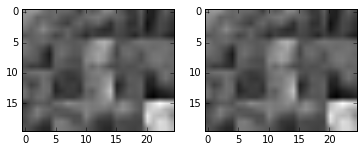

In [18]:
import matplotlib.pyplot as plt
# Two subplots, the axes array is 1-d
plt.subplot(1, 2, 1)
plt.imshow(filters[1],cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(filters[1], cmap='gray')

In [78]:
def rowsCols(totalLen):

    mejorAprox=totalLen;
    for it in range(totalLen):
        rows=totalLen/(it+1)
        if abs(rows-it)<mejorAprox:
            mejorAprox=abs(rows-it);
            mejorIt=it+1;
            rowBest=rows
            
    if  mejorIt*rowBest<totalLen:
        
        while mejorIt*rowBest<totalLen:
            
            if mejorIt<rowBest:
                mejorIt=mejorIt+1
            else:
                rowBest=rowBest+1    
           
            
    return mejorIt,rowBest
         
print rowsCols(200)        
            


(14, 15)


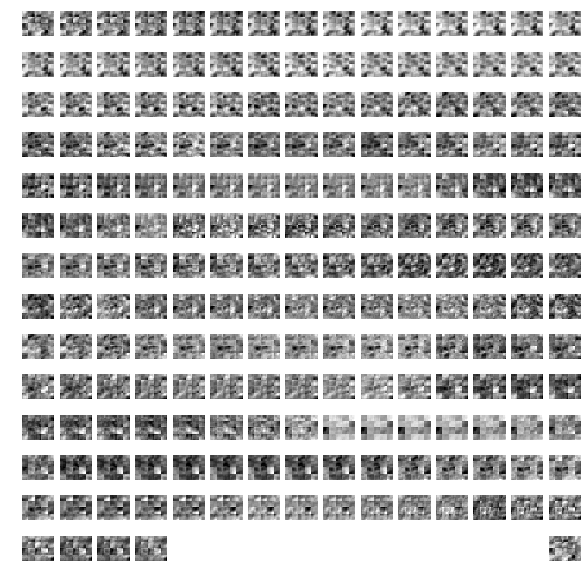

In [110]:
number_of_subplots=niter
contador=0;

[r,c]=rowsCols(niter)

for i in range(r):
    plt.axis('off')
    for j in range(c):
    
        if contador<number_of_subplots:
            plt.subplot(r, c,contador)
            plt.imshow(filters[contador],cmap='gray')
            plt.axis('off')
        contador=contador+1;
       


plt.show()

In [86]:
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (64, 1, 28, 28)),
 ('label', (64,)),
 ('conv1', (64, 20, 24, 24)),
 ('pool1', (64, 20, 12, 12)),
 ('ip2', (64, 10)),
 ('loss', ())]